# First evaluation insights

**Inputs:**
* Algorithms: bjointsp, random
* Network: Airtel
* Service: fw1chain, fw2chain, fw3chain
* Sources: source0-9

Airtel is a medium-large network with nodes far away from each other. This leads to high link delays and lower impact of rounding link delays to full integers, which was a problem with the very dense Colt network.

![Airtel](http://topology-zoo.org/maps/Airtel.jpg)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# include and import util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from util import eval


bjointsp_chain_df, bjointsp_aux_chain_df, bjointsp_vnf_df, bjointsp_aux_vnf_df = eval.prepare_eval('Airtel', 'bjointsp')
random_chain_df, random_aux_chain_df, random_vnf_df, random_aux_vnf_df = eval.prepare_eval('Airtel', 'random')

There are eight different pandas dataframes, four for each of the placement algorithms. 

chain_df contains the delays (RTTs) of the whole chain and vnf_df contains the inter-VNF delays. They have separate columns for the simulation and emulation RTTs and additional columns for the difference and the ratio between simulation and emulation RTT.

For easier plotting later, aux_chain_df and aux_vnf_df contain the same data as chain_df and vnf_df, respectiveley, just in a different structure: Here, there is just one column called 'rtt'. Simulation and emulation delays are stored in the same column in different rows. They are distinguished by a new column 'type' that is either 'sim' or 'emu', classifying the type of RTT.

For better intuition, see the tables below.

In [2]:
bjointsp_chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,bjointsp,74.0,75.10,1.10,1.014865
1,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,bjointsp,28.0,29.05,1.05,1.037500
2,Airtel.graphml,16,37,fw1chain.yaml,3,source2.yaml,1,bjointsp,64.0,65.10,1.10,1.017187
3,Airtel.graphml,16,37,fw1chain.yaml,3,source3.yaml,1,bjointsp,124.0,125.10,1.10,1.008871
4,Airtel.graphml,16,37,fw1chain.yaml,3,source4.yaml,1,bjointsp,48.0,49.10,1.10,1.022917


In [6]:
bjointsp_aux_chain_df.head()

,algorithm,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,rtt,type
0,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,74.0,sim
1,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,28.0,sim
2,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source2.yaml,1,64.0,sim
3,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source3.yaml,1,124.0,sim
4,bjointsp,Airtel.graphml,16,37,fw1chain.yaml,3,source4.yaml,1,48.0,sim


In [5]:
bjointsp_vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,bjointsp,vnf_user,vnf_fw1,60.0,60.793,0.793,1.013217
1,Airtel.graphml,16,37,fw1chain.yaml,3,source0.yaml,1,bjointsp,vnf_fw1,vnf_web,14.0,14.338,0.338,1.024143
2,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,bjointsp,vnf_user,vnf_fw1,14.0,14.321,0.321,1.022929
3,Airtel.graphml,16,37,fw1chain.yaml,3,source1.yaml,1,bjointsp,vnf_fw1,vnf_web,14.0,14.317,0.317,1.022643
4,Airtel.graphml,16,37,fw1chain.yaml,3,source2.yaml,1,bjointsp,vnf_user,vnf_fw1,44.0,44.630,0.630,1.014318


## Chain RTT

Let's start the evaluation by analyzing the RTT of the whole chain, comparing the different placement algorithms.

Text(0.5,1,'Emulation chain RTT')

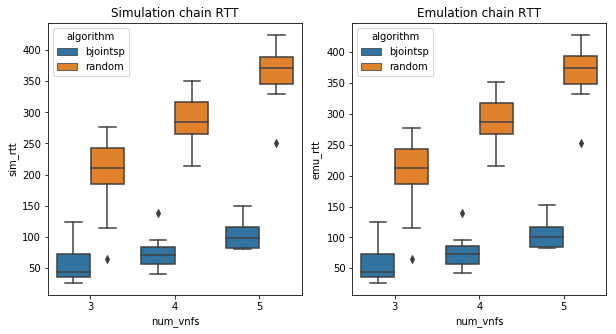

In [12]:
# comparison of bjointsp and random placement
# df with combined/concatenated results of both bjointsp and random
chain_df = pd.concat([bjointsp_chain_df, random_chain_df])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax1).set_title('Simulation chain RTT')
sns.boxplot(x='num_vnfs', y='emu_rtt', hue='algorithm', data=chain_df, ax=ax2).set_title('Emulation chain RTT')

Clearly, random placement leads to much higher simulation and emulation delays than bjointsp. For both, the delays increase notably with increasing chain length (num_vnfs).

Text(0.5,1,'Random chain RTT')

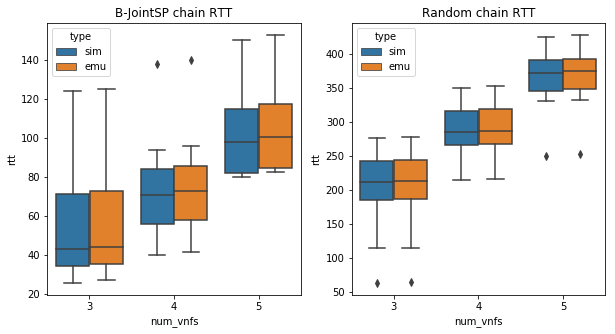

In [15]:
# comparison of simulation and emulation delays
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=bjointsp_aux_chain_df, ax=ax1).set_title('B-JointSP chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=random_aux_chain_df, ax=ax2).set_title('Random chain RTT')

Text(0.5,1,'Random chain RTT difference')

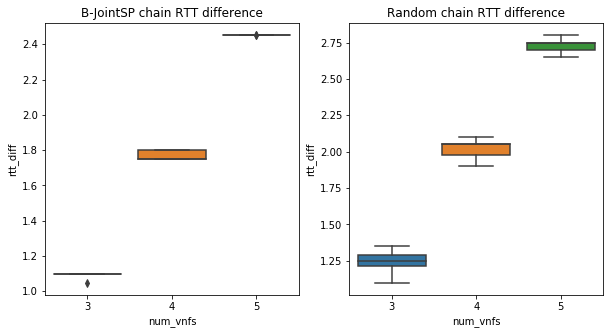

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_chain_df, ax=ax1).set_title('B-JointSP chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_chain_df, ax=ax2).set_title('Random chain RTT difference')

**Upper**: Chain delays seem to be very similar comparing simulation and emulation. Clearly, there are a variety of different RTTs per service/chain length because of different placement (each one has a different source location).

**Lower**: But when looking at the difference in RTT, the emulation delay is clearly higher than the simulation delay. And the difference between the two increases with increasing chain length. There is surprisingly little deviation in rtt_diff for each chain length.

This observation holds for both placement algorithms (bjointsp and random). The RTT difference is generally a little higher for random placement. I suspect this is due to the longer paths in random placement, on which the simulated and emulated delays differ more strongly.

Text(0.5,1,'Chain RTT ratio')

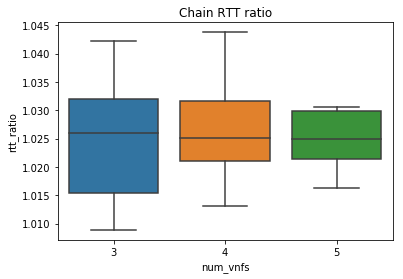

In [21]:
sns.boxplot(x='num_vnfs', y='rtt_ratio', data=chain_df).set_title('Chain RTT ratio')

While the absolute difference between emulated and simulated chain RTT clearly increases for increasing chain length, the relative ratio of the two stays fairly constant at slightly above 1.
The spread is higher for chains with three VNFs, probably due to the shorter sim_rtt (deviations affect the ratio stronger).

## Inter-VNF RTT
Let's do the same for inter-VNF delays/RTTs.

In [22]:
vnf_sim_df = vnf_df[input_cols + ['src', 'dest']].copy()
vnf_sim_df['rtt'] = vnf_df['sim_rtt']
vnf_sim_df['type'] = 'sim'

vnf_emu_df = vnf_df[input_cols + ['src', 'dest']].copy()
vnf_emu_df['rtt'] = vnf_df['emu_rtt']
vnf_emu_df['type'] = 'emu'

vnf_df2 = pd.concat([vnf_sim_df, vnf_emu_df])

Text(0.5,1,'Inter-VNF RTT comparison')

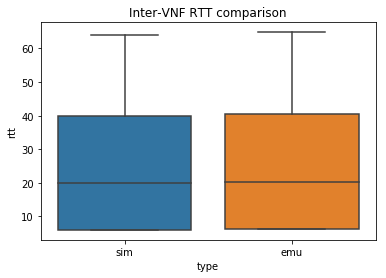

In [23]:
sns.boxplot(x='type', y='rtt', data=vnf_df2).set_title('Inter-VNF RTT comparison')

Text(0.5,1,'Inter-VNF RTT difference')

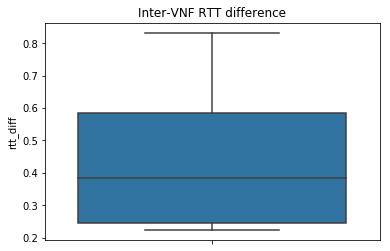

In [24]:
sns.boxplot(y='rtt_diff', data=vnf_df).set_title('Inter-VNF RTT difference')

**Upper**: Again, very similar inter-VNF RTTs in simulation and emulation.

**Lower**: Here, the difference is much smaller than it was in whole chains (less than 1 ms). However, the spread is much higher than for chains. We should analyze that further.

Text(0.5,1,'Inter-VNF RTT difference with increasing node distance')

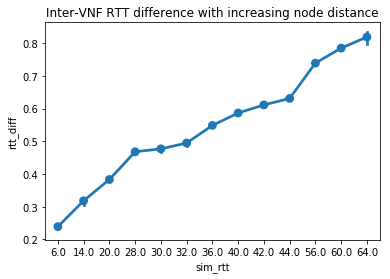

In [30]:
# plot difference as a variable of the node distance = link delay = sim delay/RTT
sns.pointplot(x='sim_rtt', y='rtt_diff', data=vnf_df).set_title('Inter-VNF RTT difference with increasing node distance')

As expected, the emulated inter-VNF RTT more from the simulated RTT with increasing node distance. I.e., for two very close nodes, the simulated and emulated delays are almost identical, but for nodes that are farther away, the emulated delay can be significantly larger.

Let's check relative difference: emu_rtt/sim_rtt

Entries with inifinite ratio: 0


Text(0.5,1,'Inter-VNF RTT ratio (only finite ratios)')

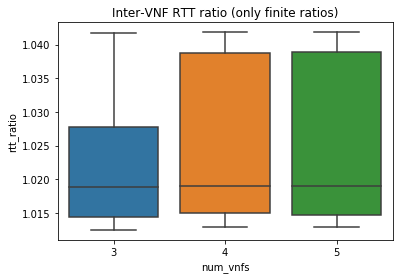

In [26]:
# set infinite ratios to NaN, so they are ignored when plotting
print('Entries with inifinite ratio: {}'.format(vnf_df['rtt_ratio'].loc[vnf_df['rtt_ratio'] == np.inf].count()))
vnf_df = vnf_df.replace(np.inf, np.nan)
sns.boxplot(x='num_vnfs', y='rtt_ratio', data=vnf_df).set_title('Inter-VNF RTT ratio (only finite ratios)')

Again, pretty much constant (independent of chain length) and very close to 1.